## Data Visualization with Python

### Source of the Data: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### In this work, I have picked FORD used cars' in UK dataset, collected primarily from the above mentioned link and used data visualization with Python to demonstrate different features of this dataset.

#### Importing file & reading

In [35]:
#importing necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")

In [36]:
#reading the csv file using panda

df= pd.read_csv("ford.csv")

In [37]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### Basic informations about this dataset:
- Model: Different models of FORD brand
- Year: Year it was manufactured
- Price: Its selling price
- Transmission: Transmission is the process through which power is transformed into momentum and thus car moves. Types of Transmission in this dataset: (Automatic, Manual or Semi-automatic)
- Mileage: Miles travelled by since it was bought
- Fueltype: Fuel it uses
- MPG: Fuel it costs (measured in gallon) per mile
- Enginesize: Its engine feature- volume of fuel and air that can be pushed through a car's cylinder

#### Checking number of unique values for different columns

In [38]:
#Checking Total Number of Unique Models presented in the data

total_models= len(df['model'].unique())
total_years= len(df['year'].unique())
total_transmission= len(df['transmission'].unique())
total_fuelType = len(df['fuelType'].value_counts())

print("Total number of unique MODELS' data presented : ", total_models )
print("Total number of YEARS' data presented: ", total_years )
print("Total number of unique TRANSMISSION types existing in the data : ", total_transmission )
print("Total number of FUELTYPE present in the data: ", total_fuelType)

Total number of unique MODELS' data presented :  23
Total number of YEARS' data presented:  22
Total number of unique TRANSMISSION types existing in the data :  3
Total number of FUELTYPE present in the data:  5


#### Creating function to determine percentage of different values under a specific feature

In [39]:
def percent_count_df(data, col):
    
    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)                                         # Creating dataframe
    col_count = col_count.reset_index()                                         # Rearranging index
    col_count = col_count.rename(columns= {'index':col, col: '% of Cars'} )     # Renaming appropriate index
    col_count['% of Cars'] = col_count['% of Cars']*100
    col_count['% of Cars'] = col_count['% of Cars'].round(2)         # Transforming into percentage & rounded figure
    
    return col_count

In [40]:
# Calling functions create dataframe with appropriate percentage value

fuelType_count = percent_count_df(df, 'fuelType')
transmission_count = percent_count_df(df, 'transmission')
model_count = percent_count_df(df, 'model')

In [41]:
year_count = percent_count_df(df, 'year')
year_count = year_count.sort_values(by='year')                       #Arranging years in an order to show in barplot
#display(year_count.head())

#### Creating function for barplot

In [42]:
def barplot(data, x_column, y_column, color, yticks, rotation, palette):
    sns.barplot(x=x_column, y=y_column, data=data, color=color, palette=palette)
    plt.title("Percentage of cars with different " + x_column)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_column)
    plt.ylabel("Percentage of Cars")

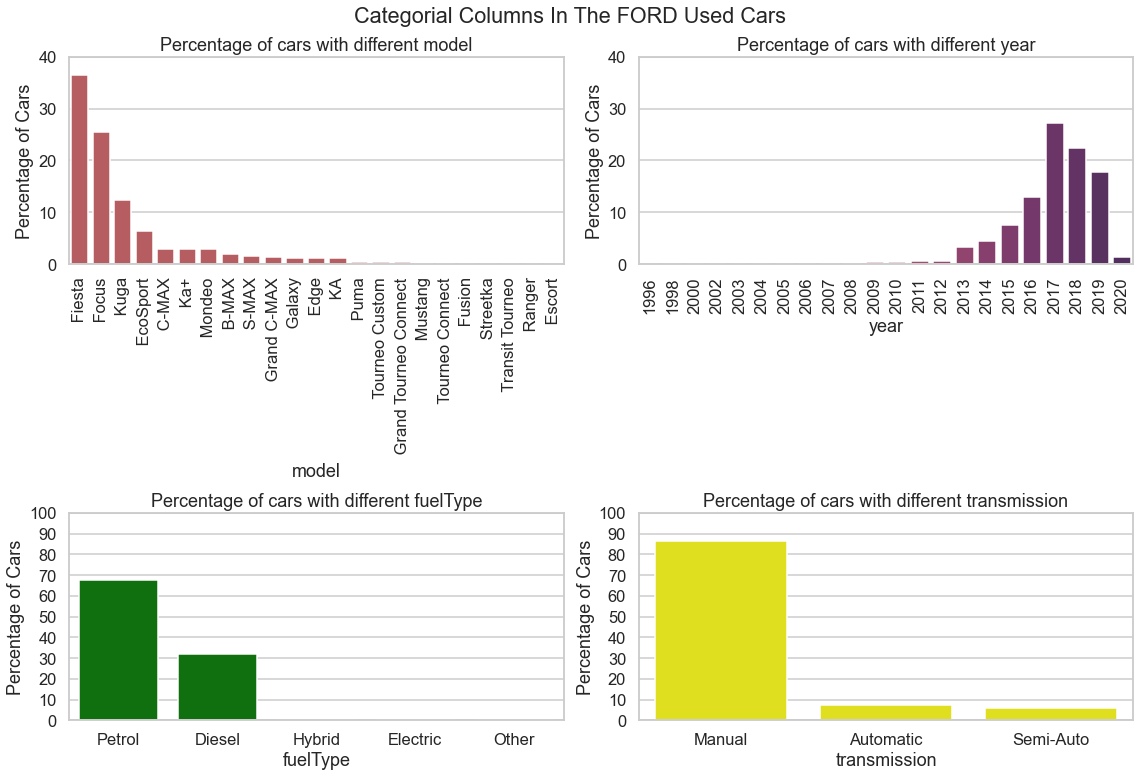

In [43]:
sns.set_context("talk")
plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
barplot(model_count, 'model', '% of Cars', 'r', np.arange(0,41,10), 90, None )


plt.subplot(2,2,4)
barplot(transmission_count, 'transmission', '% of Cars', 'yellow', np.arange(0,101,10), 0, None )


plt.subplot(2,2,3)
barplot(fuelType_count, 'fuelType', '% of Cars', 'green', np.arange(0,101,10), 0, None)

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of Cars', 'blue', np.arange(0,41,10), 90, "flare")

plt.suptitle("Categorial Columns In The FORD Used Cars")
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()

## Scatterplot, Trendline

- Mileage vs Price relation with respect to different parameters as hue 

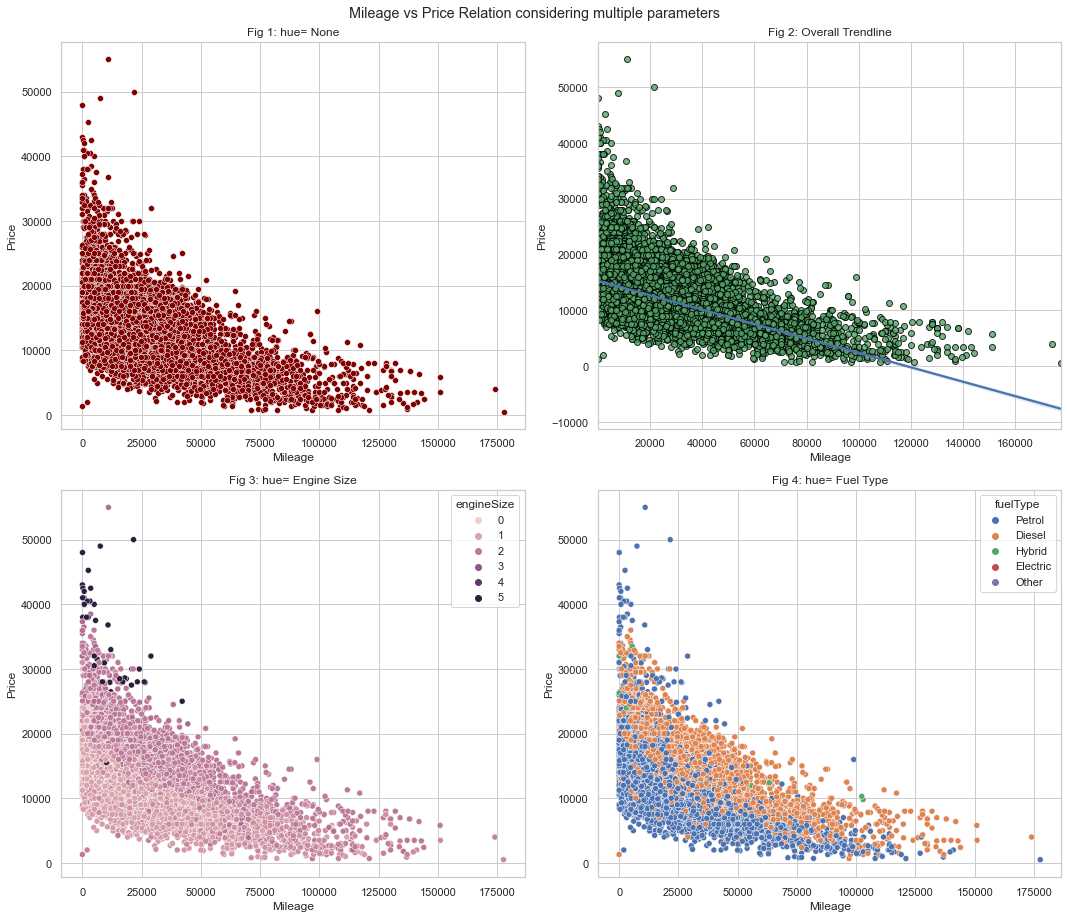

In [44]:
plt.figure(figsize=(15,13))


plt.subplot(2,2,1)
sns.scatterplot(x="mileage", y="price", data=df, color='maroon')
plt.title("Fig 1: hue= None")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.subplot(2,2,2)
sns.regplot(x="mileage", y="price", data=df, fit_reg=True, scatter_kws={'color':'g', 'edgecolor':'black'})
plt.title("Fig 2: Overall Trendline")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.subplot(2,2,3)
sns.scatterplot(x="mileage", y="price", data=df, color='maroon', hue='engineSize')
plt.title("Fig 3: hue= Engine Size")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.subplot(2,2,4)
sns.scatterplot(x="mileage", y="price", data=df, color='maroon', hue='fuelType')
plt.title("Fig 4: hue= Fuel Type")
plt.xlabel("Mileage")
plt.ylabel("Price")



plt.suptitle("Mileage vs Price Relation considering multiple parameters")
plt.tight_layout()
plt.show()

### From these scatterplots, it can be said that-
- In fig 1: With decrease in mileage, price decreases too.
- In fig 2: Price decreases with increase in mileage. This trend mostly follows a straighline. This can be proved better with the following two plots.
- In fig 3: When we add engine size as hue parameter, It clearly shows that for any given mileage, price of a car increases with increase in engine size. The more upwards we move, the darker the colour it gets, which means price increases when engine size increases, for almost any given mileage
- In fig 4: This plot is biased towards Petrol & Diesel cars. The percentage of Hybrid, Electrical or Other fuelType cars' present, is not comparable with Petrol and Diesel. But when we compare Petrol and Diesel cars, most of the petrol cars cost less then Diesel cars, for any given mileage value.  Only a very few exceptions are present in the data. But it can be underlined that, for used cars, Petrol cars cost less.

#### Histograms